In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras import layers
from scikeras.wrappers import KerasClassifier
import sklearn
from sklearn.model_selection import GridSearchCV
from tensorflow import random
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
seed_value = 42
np.random.seed(seed_value)
random.set_seed(seed_value)

In [3]:
# import data 
training_data = pd.read_csv('./as1-bank-1.csv')
#training_data

In [4]:
training_data.replace("yes", 1, inplace=True)
training_data.replace("no", 0, inplace=True)

In [5]:
# Grab the quality column, and then remove it from the main Dataframe.
training_y = training_data.pop('y')

training_x = training_data

In [6]:

#selected_features = ['age', 'marital', 'education', 'default' , 'balance', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays' ,'previous', 'poutcome']
selected_features = ['age', 'marital', 'education', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays' , 'poutcome']


training_x = training_x[selected_features]
#training_x

In [7]:
arr_train_x = training_x.to_numpy()
arr_train_y = training_y.to_numpy()

In [8]:
from sklearn.preprocessing import StandardScaler
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(arr_train_x)

In [9]:
from sklearn.model_selection import train_test_split

# Train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X_train_scaled, arr_train_y, test_size=0.3, random_state=seed_value)


In [10]:
model = keras.Sequential()

model .add(layers.InputLayer(input_shape=(10))) # 10 Columns of input

model .add(layers.Dense(256, activation='relu'))

model .add(layers.Dense(512, activation='relu'))

model .add(layers.Dense(1, activation="sigmoid")) # 0->1 floating

model .summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 134913 (527.00 KB)
Trainable params: 134913 (527.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Compile the model.
model.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [12]:
model_training_history = model.fit(
    X_train,
    Y_train,
    #batch_size = 50,
    epochs = 60,
)

Epoch 1/60
172/172 [==============================] - 1s 2ms/step - loss: 0.5601 - accuracy: 0.7499
Epoch 2/60
172/172 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.7752
Epoch 3/60
172/172 [==============================] - 0s 3ms/step - loss: 0.4326 - accuracy: 0.7872
Epoch 4/60
172/172 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.7972
Epoch 5/60
172/172 [==============================] - 0s 2ms/step - loss: 0.4042 - accuracy: 0.8027
Epoch 6/60
172/172 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8109
Epoch 7/60
172/172 [==============================] - 0s 3ms/step - loss: 0.3935 - accuracy: 0.8116
Epoch 8/60
172/172 [==============================] - 0s 2ms/step - loss: 0.3895 - accuracy: 0.8122
Epoch 9/60
172/172 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8147
Epoch 10/60
172/172 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.8171

Text(0.5, 0, 'epochs')

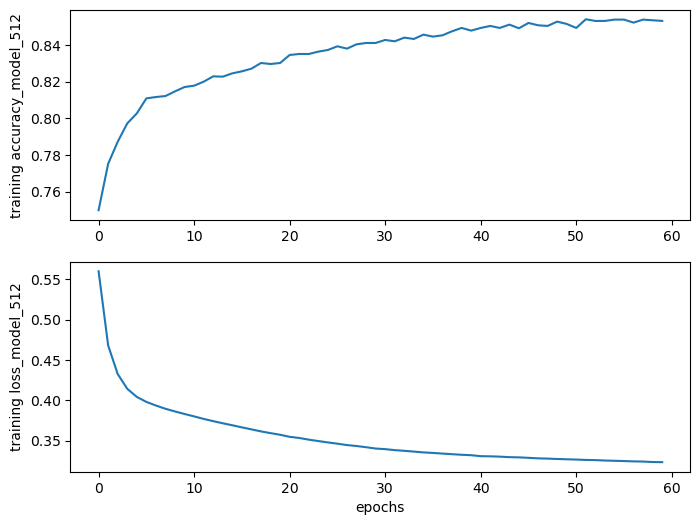

In [13]:


# If we want to be fancy, we can set a theme by uncommenting the below line.
#plt.style.use('ggplot')

# Set up a figure, and two handles for our 2 figures.
# Subplot can make many many plots within a single figure.
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

# Get our accuracy and loss metrics (these should be lists of numbers)
acc = model_training_history.history['accuracy']
loss = model_training_history.history['loss']

# We want accuracy on our first graph
ax1.plot(acc)
# Loss on our second
ax2.plot(loss)
    
# Give our figures some x and y axis labels.
ax1.set_ylabel('training accuracy_model_512')
ax2.set_ylabel('training loss_model_512')

# They both share an x axis, so we only need to define it on the bottom-most.
ax2.set_xlabel('epochs')

In [14]:
y_pred = model.predict(X_test)

74/74 [==============================] - 0s 2ms/step


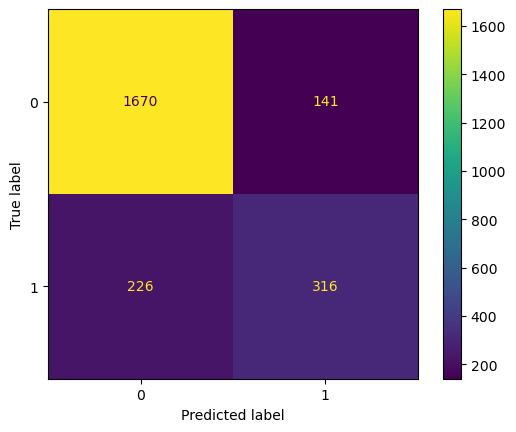

In [15]:
a  = ConfusionMatrixDisplay.from_predictions(Y_test, np.round(y_pred))

In [16]:
class_ = classification_report(Y_test, np.round(y_pred))
print(class_)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1811
           1       0.69      0.58      0.63       542

    accuracy                           0.84      2353
   macro avg       0.79      0.75      0.77      2353
weighted avg       0.84      0.84      0.84      2353



In [17]:
#export data into csv file
import pandas
report = classification_report(Y_test, np.round(y_pred), output_dict=True)
df = pandas.DataFrame(report).transpose()
df.to_csv('n256_512.csv', index= True)